# GRIP @ The Spark Foundation

#### **DATA SCIENCE AND BUSINESS ANALYTICS**

#### **Task 2** - Prediction using Unsupervised ML

#### **Description** - From the given 'Iris' Dataset, predict the optimum number of cluster and represent it visually. 

#### **Author** - Jay Vaghela

Dataset Link - https://bit.ly/3kXTdox *

### 1. Importing the Requisite Libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### 2. Load the Iris Dataset

In [3]:
iris = pd.read_csv('Iris.csv')
iris_dataf = pd.DataFrame(iris)
iris_dataf.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 3. Determining Optimum number of Cluster for K-means Classification

In [4]:
x = iris_dataf.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, 
                    random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


C:\Users\jayva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 4. Ploting the Result to Observe the 'Elbow' Curve

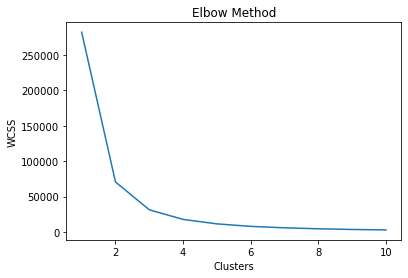

In [5]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

**NOTE** - When Elbow Occurs the WCSS doesn't decrease with every iteration

### 5. Predicting using K-means Classifier

In [6]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)

y_kmodel = model.fit_predict(x)

### 6. Visualising the Resulting Clusters

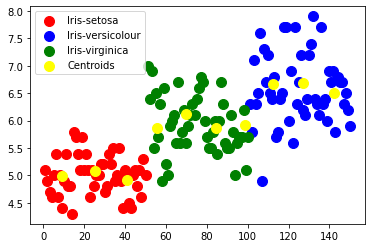

In [7]:
plt.scatter(x[y_kmodel == 0, 0], x[y_kmodel == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmodel == 1, 0], x[y_kmodel == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmodel == 2, 0], x[y_kmodel == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', 
            label = 'Centroids')

plt.legend()

## Thank You!